# Heat Exchange in a Series of Tanks
This is the sixth problem of the famous set of [Ten Problems in Chemical Engineering](https://www.polymath-software.com/ASEE/Tenprobs.pdf).  Here, the goal is to solve simultaneous first order ordinary differential equations.


# Problem Setup

There are three tanks in series 

$$\frac{dT_1}{dt} = [WC_p(T_0-T_1)+UA(T_{steam}-T_1)]/(MC_p)$$

$$\frac{dT_2}{dt} = [WC_p(T_1-T_2)+UA(T_{steam}-T_2)]/(MC_p)$$

$$\frac{dT_3}{dt} = [WC_p(T_2-T_3)+UA(T_{steam}-T_3)]/(MC_p)$$

# Problem Tasks
Determine the steady state temperatures in all three tanks. What time interval will be required for T3 to reach 99% of this steady state value during startup?

# Solutions
To solve ODEs, `scipy.integrate` is useful package.  To integrate the odes, first write a function that returns the derivatives as a functions of temperature.  The constants can be defined outside the function or passed into the function as extra arguments.  Here we will define the values outside the function.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def dTdt(t,T):
    dT1 = (W*Cp*(T0-T[0]) + UA*(Tsteam-T[0]))/(M*Cp)
    dT2 = (W*Cp*(T[0]-T[1]) + UA*(Tsteam-T[1]))/(M*Cp)
    dT3 = (W*Cp*(T[1]-T[2]) + UA*(Tsteam-T[2]))/(M*Cp)
    return(dT1,dT2,dT3)

W = 100
UA = 10
Tsteam = 250
T0 = 20
M = 1000
Cp = 2.0

t_span = [0, 90]
t_eval = np.linspace(0,90,num =100) # use a finer grid for output
sol = solve_ivp(dTdt,t_span,[T0,T0,T0],t_eval=t_eval)

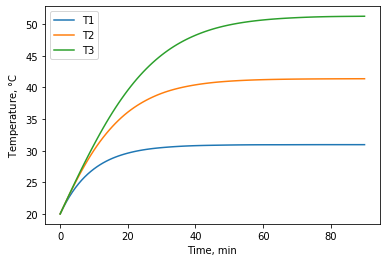

In [2]:

plt.plot(sol.t,sol.y.T)
plt.xlabel('Time, min')
plt.ylabel('Temperature, $\degree$C')
plt.legend(['T1','T2','T3'])

To interpolate the time to reach 99% use `scipy.interpolate.interp1d` 

In [3]:
from scipy.interpolate import interp1d
T3 = sol.y[2,:] # extract the third temperature
time = sol.t
time_to_99 = interp1d(T3,time)(0.99*np.max(T3)) # interp1d returns a function, that is called right away with our point of interest
print('Time to reach 99% of steady state: {:.4} min'.format(time_to_99))

Time to reach 99% of steady state: 61.54 min


# Reference
“The Use of Mathematical Software packages in Chemical Engineering”, Michael B. Cutlip, John J. Hwalek, Eric H.
Nuttal, Mordechai Shacham, Workshop Material from Session 12, Chemical Engineering Summer School, Snowbird,
Utah, Aug., 1997.